In [23]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [24]:
class AgentState(TypedDict):
    num1: int
    operation: str
    num2: int
    num3: int
    operation2: str
    num4: int
    result: int
    result2: int

In [25]:
def add_operation(state: AgentState) -> AgentState:

    state["result"] = state["num1"] + state["num2"]
    return state

def sub_operation(state: AgentState) -> AgentState:

    state["result"] = state["num1"] - state["num2"]
    return state

def transition(state: AgentState) -> AgentState:
    if state["operation"] == "+":
        return "addition_operation"
    elif state["operation"] == "-":
        return "substration_operation"
    
def add_operation2(state: AgentState) -> AgentState:

    state["result2"] = state["num3"] + state["num4"]
    return state

def sub_operation2(state: AgentState) -> AgentState:

    state["result2"] = state["num3"] - state["num4"]
    return state

def transition2(state: AgentState) -> AgentState:
    if state["operation2"] == "+":
        return "addition_operation2"
    elif state["operation2"] == "-":
        return "substration_operation2"

In [26]:
graph = StateGraph(AgentState)

graph.add_node("add_node", add_operation)
graph.add_node("sub_node", sub_operation)
graph.add_node("router", lambda state: state)

graph.add_node("add_node2", add_operation2)
graph.add_node("sub_node2", sub_operation2)
graph.add_node("router2", lambda state: state)

graph.add_edge(START, "router")

graph.add_conditional_edges(
    "router",
    transition,
    {
        "addition_operation": "add_node",
        "substration_operation": "sub_node"
    }
)

graph.add_edge("add_node", "router2")
graph.add_edge("sub_node", "router2")


graph.add_conditional_edges(
    "router2",
    transition2,
    {
        "addition_operation2": "add_node2",
        "substration_operation2": "sub_node2"
    }
)

graph.add_edge("add_node2", END)
graph.add_edge("sub_node2", END)

app = graph.compile()

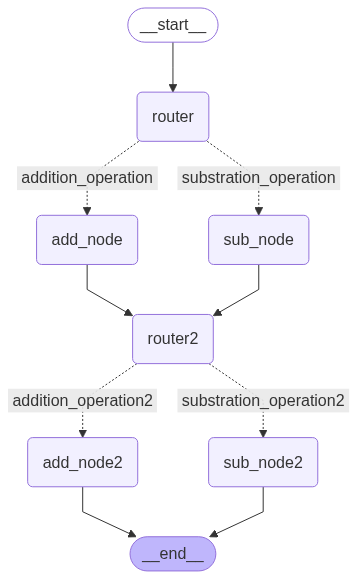

In [27]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [28]:
initial_state = AgentState(num1=111, operation="-", num2=3, num3=88, num4=93, operation2="+", result=0, result2=0)

final_res = app.invoke(initial_state)
print(final_res)

{'num1': 111, 'operation': '-', 'num2': 3, 'num3': 88, 'operation2': '+', 'num4': 93, 'result': 108, 'result2': 181}


In [29]:
fresult = app.invoke({"num1": 100, "operation": "-", "num2": 72, "num3": 21, "num4": 19, "operation2": "+", "result": 0, "result2": 0})
print(fresult)

{'num1': 100, 'operation': '-', 'num2': 72, 'num3': 21, 'operation2': '+', 'num4': 19, 'result': 28, 'result2': 40}
